<center><h1> Markov Chains and Hidden Markov Models </h1></center>

# Import

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Functions
np.cumsum(p)
np.random.random()
filename_A= 'bigramenglish.txt' 
np.loadtxt(filename_A)
dic_inv = {v: k for k, v in dic.items()}

# Part 1

On veut générer des mots dans une langue donnée en modélisant la formation de ces mots par une chaîne de Markov. Les 28 états du modèle correspondent aux 26 lettres de l’alphabet auxquelles et on ajoute un état ‘espace initial’ (état 1) et un état ‘espace final’ (état 28) qui sert à terminer les mots.

La correspondance entre la valeur numérique d’un état et un caractère est la suivante : l’état 1 correspond à un espace (avant le début d’un mot) et l’état 28 à celui d’un espace en fin de
mot. 

Les états 2 à 27 correspondent aux caractères de a à z. On pourra utiliser une structure de dictionnaire en python pour faire cette correspondance.
On utilisera une chaîne de Markov ergodique entre les 26 états correspondants aux lettres de l’alphabet.

## 1.2 Matrice de transitions

*Le fichier `bigramenglish.txt` contient la matrice des transitions pour l’anglais (bigrams) entre deux symboles (caractères ou espaces). Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i.*

*A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la dernière colonne ?
Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre.*

In [3]:
filename_A= 'Part1/bigramenglish.txt' 
bi_eng = np.loadtxt(filename_A)

In [4]:
bi_eng

array([[0.0000000e+00, 1.1268720e-01, 4.3608943e-02, 4.5454545e-02,
        3.2904451e-02, 2.2094495e-02, 4.1763341e-02, 1.5555790e-02,
        6.4437882e-02, 6.8920059e-02, 3.6384729e-03, 4.2185193e-03,
        2.3465514e-02, 3.9759544e-02, 2.2832736e-02, 7.0343809e-02,
        3.1058848e-02, 1.4237503e-03, 2.5680236e-02, 6.6916262e-02,
        1.6452225e-01, 1.0388104e-02, 7.0660198e-03, 7.0502004e-02,
        1.0546298e-04, 1.0599030e-02, 5.2731491e-05, 0.0000000e+00],
       [0.0000000e+00, 1.4701126e-05, 2.2933757e-02, 3.3959601e-02,
        3.8075917e-02, 1.4701126e-04, 6.1744730e-03, 2.4697892e-02,
        8.8206757e-04, 3.7046838e-02, 8.8206757e-04, 1.1907912e-02,
        8.1150216e-02, 3.5870748e-02, 2.2051689e-01, 1.4701126e-04,
        1.8082385e-02, 1.4701126e-05, 9.4822263e-02, 9.5410308e-02,
        1.3348623e-01, 1.1760901e-02, 3.3371556e-02, 9.8497545e-03,
        5.8804504e-04, 1.9846520e-02, 8.8206757e-04, 6.7478169e-02],
       [0.0000000e+00, 7.1874260e-02, 7.898270

**Answer** : Les probabilités de la première ligne correspondent aux probabilitées de transitions en partant de l'état initial.

Les probabilités de la dernière ligne correspondent aux probabilités de transitions de l'état final. C'est un état absorbant, car il signale la fin du mot.

*Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre.*

In [15]:
dic={1 : ' ', 
     2 : 'a', 
     3 : 'b', 
     4: 'c', 
     5 : 'd', 
     6 : 'e', 
     7: 'f', 
     8 : 'g', 
     9 : 'h', 
     10: 'i', 
     11: 'j', 
     12 : 'k', 
     13 : 'l', 
     14: 'm', 
     15 : 'n', 
     16 : 'o', 
     17: 'p', 
     18 : 'q', 
     19 : 'r' , 
     20: 's', 
     21 : 't', 
     22 : 'u', 
     23: 'v', 
     24 : 'w', 
     25 : 'x' , 
     26: 'y', 
     27 : 'z', 
     28 : ' ' }

In [19]:
[dic[x+1] for x in np.argmax(bi_eng, axis=1)]

['t',
 'n',
 'e',
 'o',
 ' ',
 ' ',
 ' ',
 ' ',
 'e',
 'n',
 'o',
 ' ',
 'e',
 'e',
 ' ',
 'n',
 'e',
 'u',
 'e',
 ' ',
 'h',
 'r',
 'e',
 'a',
 't',
 ' ',
 'e',
 ' ']

## 1.3 Générer un mot

*On veut générer un mot à partir de l’état initial 1 (espace de début de mot).*

*Ecrire une fonction etat_suivant qui génère un état (à t+1) à partir de l’état courant (à t) et à l’aide de la matrice de transitions et de la fonction de répartition.*

In [350]:
def etat_suivant(dic, bi_gram, state) :
    
    x = np.random.random()
    line = bi_gram[state-1]
    
    thr = np.where(np.cumsum(line)>x)[0][0]+1
    return thr

In [381]:
etat_suivant(dic, bi_eng, 1)

21

*Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.*

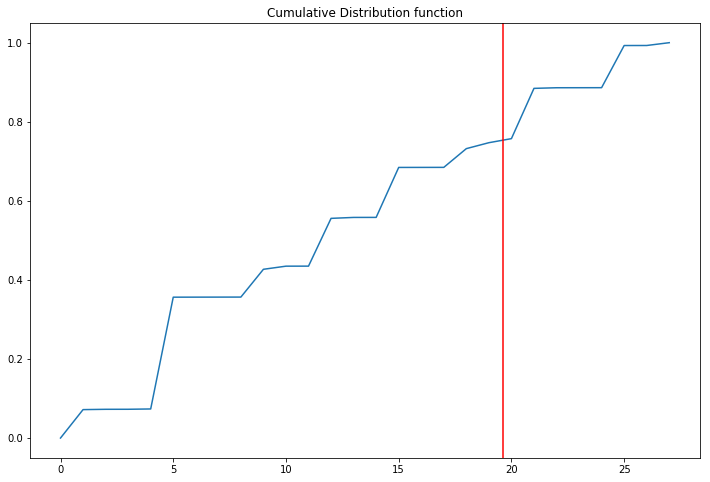

In [188]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(bi_eng[2]))
plt.title("Cumulative Distribution function")
plt.axvline(np.random.random()*28, c='red')
plt.show()

**Answer** : La fonction cumulative de distribution permet de savoir quel chiffre tirer par la suite.

*Utiliser cette fonction pour écrire la fonction genere_state_seq qui génère une séquence d’états jusqu’à aboutir à l’état final (28).*

In [198]:
def genere_state_seq(dic, bi_gram) :
    state = 1
    seq = []
    while state != 28 :
        state = etat_suivant(dic, bi_gram, state)
        seq.append(dic[state])
    return ''.join(seq)

*Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés.*

In [386]:
for i in range(50) :
    print(genere_state_seq(dic, bi_eng))

foked 
pondes 
hirm 
aga 
w 
bopathe 
thigicacth 
re 
m 
pis 
wofi 
nt 
whernathid 
opldaledatrknt 
d 
wan 
clily 
wimpts 
d 
ththane 
wathipethentocto 
poct 
rutem 
em 
hel 
d 
t 
ck 
isoro 
besathesh 
craigousththio 
arof 
elegrifoun 
iotsker 
ou 
tomepsasmad 
t 
wacareramuby 
toved 
nit 
ith 
w 
oly 
d 
ie 
shercoly 
mave 
muss 
rnin 
uriny 


## 1.4 Générer une phrase

*On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29, correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1. Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition et le dictionnaire en conséquence. Donner des exemples de phrases générées.*

In [294]:
def modify_mat_dic(bi_eng) :
    
    # Append new column
    new_col = (np.zeros(28)).T
    bi_eng = np.vstack( (bi_eng, new_col) )
    
    # Append new line
    new_line = np.zeros(29).reshape(-1,1)
    bi_eng = np.hstack( (bi_eng, new_line) )
    bi_eng[-1,-1] = 1
    
    # Modify before last line
    bi_eng[-2] = np.zeros(29)
    bi_eng[-2,0] = 0.9
    bi_eng[-2,-1] = 0.1
    
    return bi_eng

In [295]:
bi_eng_mod = modify_mat_dic(bi_eng)

In [389]:
dic_2 ={1 : ' ', 
     2 : 'a', 
     3 : 'b', 
     4: 'c', 
     5 : 'd', 
     6 : 'e', 
     7: 'f', 
     8 : 'g', 
     9 : 'h', 
     10: 'i', 
     11: 'j', 
     12 : 'k', 
     13 : 'l', 
     14: 'm', 
     15 : 'n', 
     16 : 'o', 
     17: 'p', 
     18 : 'q', 
     19 : 'r' , 
     20: 's', 
     21 : 't', 
     22 : 'u', 
     23: 'v', 
     24 : 'w', 
     25 : 'x' , 
     26: 'y', 
     27 : 'z', 
     28 : '',
     29 : '.'}

In [392]:
def genere_state_seq_2(dic, bi_gram) :
    state = 1
    seq = []
    while state != 29 :
        state = etat_suivant(dic, bi_gram, state)
        seq.append(dic[state])
    return ''.join(seq)

In [407]:
for i in range(20) :
    print(genere_state_seq_2(dic_2, bi_eng_mod))

o htr mp t t os aild ivild incte iommy sert tsseree sty.
ssf y.
ioherit evin the han atlizas ate batwand me atelir h f.
it bedeithilldere ber taroony camart coles w is bileng s or dsthonof thun d fugeil bed thetanindissethfeend melo o time atilicowelmondrenll out y s fise the ak.
iraling f to on d aro tis y won f oman at eriersirerequlit d berfonotandd s lllamed.
g hilonndutout t fin ustl best wecave atheee bjubrove t unguthend m wiel.
tischagy o wind meste w omserithowhoncke lin s he himirerily aiveghans it thand a.
othe ts in d.
h atithir bandy oo isirincowh e clerem.
yss ne acheland.
try fe obaioithe.
mungoutheen msthe smut sinand.
m.
nta.
y lente me ithithetcon fued g mefewhiverercuplithase monthe ondon amowhe se ck nckisthof ad.
mepr icidor f be t id he gis on osed pryoncanetof diang ttollouatid othof atheamiscass s ino n buprt ioty awaut omaswantrace tin il y oibes thit antt uperme thedit ck avotes ry thecy.
ithe tl t an cicuack ol oune d me iren me.
hetoghe t incininghanan ongho

## 1.5 Reconnaissance de la langue

*Charger la matrice des transitions entre caractères pour le français. Ecrire une fonction calc_vraisemblance qui calcule la vraisemblance du modèle français pour une phrase donnée en multipliant les probabilités de transition. Pour tenir compte de toutes les transitions (notamment celles entre espaces de fin et de début de mots et vers la fin de phrase) on pourra transformer (manuellement) une séquence « mot1 mot2.» par la séquence « -mot1+-mot2+.», les signes - , + et . représentant l’état initial de mot, l’état final de mot et l’état final de phrase, respectivement.*

In [301]:
filename_A= 'Part1/bigramfrancais.txt' 
bi_fr = np.loadtxt(filename_A)

In [324]:
bi_fr_mod = modify_mat_dic(bi_fr)

In [309]:
dic_3 ={1 : '+', 
     2 : 'a', 
     3 : 'b', 
     4: 'c', 
     5 : 'd', 
     6 : 'e', 
     7: 'f', 
     8 : 'g', 
     9 : 'h', 
     10: 'i', 
     11: 'j', 
     12 : 'k', 
     13 : 'l', 
     14: 'm', 
     15 : 'n', 
     16 : 'o', 
     17: 'p', 
     18 : 'q', 
     19 : 'r' , 
     20: 's', 
     21 : 't', 
     22 : 'u', 
     23: 'v', 
     24 : 'w', 
     25 : 'x' , 
     26: 'y', 
     27 : 'z', 
     28 : '-',
     29 : '.'}

In [340]:
def calc_vraisemblance(dic, bi_eng, bi_fr, seq) :
    key_0 = 0
    trans_eng = 1
    trans_fra = 1
    
    for letter in seq :
        key_1 = [key for key, val in dic.items() if val == letter][0] - 1

        trans_eng = trans_eng * bi_eng[key_0, key_1]
        trans_fra = trans_fra * bi_fr[key_0, key_1]

        key_0 = [key for key, val in dic.items() if val == letter][0] - 1
    
    if trans_eng > trans_fra :
        print("It's English !")
    else :
        print("It's French !") 
    return trans_eng, trans_fra

*Calculer la vraisemblance des modèles français et anglais pour la phrase « to be or not to be ». De même calculer la vraisemblance des modèles français et anglais pour la phrase « etre ou ne pas etre ».*

In [342]:
calc_vraisemblance(dic_3, bi_eng_mod, bi_fr_mod, 'etre-+ou-+ne-+pas-+etre-.')

It's French !


(4.462288711775253e-24, 1.145706887234789e-19)

In [341]:
calc_vraisemblance(dic_3, bi_eng_mod, bi_fr_mod, 'to-+be-+or-+not-+to-+be-.')

It's English !


(8.112892227809415e-20, 5.9602081018686406e-30)

# Part 2

L’objectif de cette partie est de générer des séquences d’observations suivant un modèle de Markov Caché donné, puis de calculer la vraisemblance d’une séquence d’observations suivant un modèle de Markov Caché donné.


Le modèle de Markov est de type discret. 

Les classes de caractères (classes 0, 1,..., 7 dans la base MNIST) sont modélisées chacune par un modèle à Q=5 états de type gauche-droite. 

- Les états 1 et 5 correspondent à des colonnes de pixels de type fond de l’image (niveau 0). 
- Les états 2, 3 et 4 correspondent au début, milieu et fin du caractère respectivement. 
- Les transitions entre états sont indiquées dans la matrice de transitions A de taille QxQ. 
- Les vecteurs π sont tous égaux à π=(1 0 0 0 0). Les séquences d’états commencent donc toujours par l’état q1=1.

In [428]:
A0 = np.loadtxt('Part2/A0.txt')
B0 = np.loadtxt('Part2/B0.txt')
Pi0 = np.loadtxt('Part2/vect_pi0.txt')

In [436]:
A0.shape, B0.shape, Pi0.shape

((5, 5), (32, 5), (5,))

In [429]:
A0

array([[ 0.84178118,  0.15821882, -0.        , -0.        , -0.        ],
       [-0.        ,  0.7886163 ,  0.2113837 , -0.        , -0.        ],
       [-0.        , -0.        ,  0.86339743,  0.13660257, -0.        ],
       [-0.        , -0.        , -0.        ,  0.79150194,  0.20849806],
       [-0.        , -0.        , -0.        , -0.        ,  1.        ]])

In [431]:
Pi0

array([1., 0., 0., 0., 0.])

Les séquences d’observations sont discrètes et issues d’images de chiffres de la base MNIST. Les séquences d’observations consistent en séquences d’index (symboles) des éléments du dictionnaire.

<img src='img.png'>

Ce dictionnaire est stocké sous forme matricielle (matrice v).

In [437]:
filename='Part2/matrice_symboles.txt'
v = np.loadtxt(filename)
v.shape

(5, 32)

In [434]:
v

array([[0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
        0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.]])

L’élément numéro `i` d’une séquence d’observations correspond au symbole `i` et donc à la colonne `i` de la matrice v. Un symbole correspond à une configuration de colonne de 5 pixels (binaires : noir/blanc). Il y a 2^5=32 configurations, et donc symboles possibles.

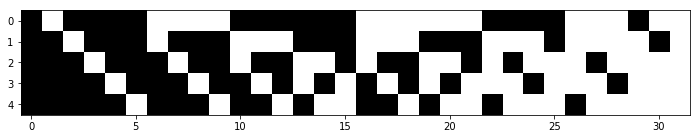

In [433]:
plt.figure(figsize=(12,8))
plt.imshow(v, 'gray')
plt.show()

Une séquence d’observations correspondant à l’image simplifiée de la fig. 1 est :
[1 1 1 1 1 1 14 23 23 27 18 18 18 12 12 12 12 12 12 12 23 23 23 14 4 1 1 1]

La concaténation des éléments du dictionnaire correspondant aux index de la séquence d’observations peut être visualisée sous forme d’image en remplaçant chaque index par le vecteur de pixels correspondant dans le dictionnaire

Les probabilités des observations dans chaque état sont indiquées dans la matrice B (32 lignes, 5 colonnes).

In [435]:
B0.shape

(32, 5)

In [442]:
np.round(B0,2)

array([[ 1.  , -0.  , -0.  , -0.  ,  1.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.02, -0.  ],
       [-0.  ,  0.08,  0.  ,  0.13, -0.  ],
       [-0.  ,  0.01,  0.02,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.02,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.02,  0.  ,  0.16, -0.  ],
       [-0.  ,  0.  ,  0.32,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.22,  0.  ,  0.05, -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.02, -0.  ],
       [-0.  ,  0.  ,  0.45,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.57,  0.  ,  0.

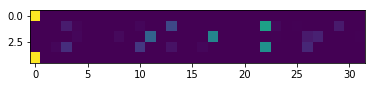

In [441]:
plt.imshow(B0.T)

## 2.1 Génération de séquences d’observations

*A quoi correspondent les zéros de la matrice B ? et ceux de la matrice A et du vecteur π?*

**Answer** : 
    
- Les 0 de la matrice B correspondent aux probabilités nulles d'observation dans un état donné. 
- Les 0 de la matrice A correspondent aux probabilités de transition d'un état à l'autre.
- Les 0 du vecteur π correspondent au fait que l'on comment à l'état 1.

*Ecrire une fonction etat_suivant qui génère un état qt+1(à t+1) à partir de l’état courant qt (à t) à l’aide de la matrice de transitions et de la fonction de répartition cumsum.*

*Afficher la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.*

*Générer une séquence d’observations suivant le modèle de Markov Caché du chiffre 0. On commencera par générer une séquence d’états suivant ce modèle à l’aide de la fonction etat_suivant. Puis on générera la séquence d’observations par le même procédé.*

*Visualiser le résultat sous forme d’image. Générer des séquences pour le chiffre 7 et le chiffre 1 (matrices B1.txt, B7.txt, etc...)*

In [ ]:
im=[]

# les x contiennent les index dans le dictionnaire for t in range (0,len(stateSeq)) :
im_col=v[:, x[t]-1] 
im.append(im_col)
im = np.array(im).T # now make an array

plt.imshow(im*255, cmap=’Greys’, interpolation=’none’, aspect=’auto’)

## 2.2 Calcul de la vraisemblance de séquences d’observations

Les fichiers SeqTest0.txt, SeqTest1.txt, SeqTest7.txt contiennent chacun 10 séquences d’observations de chiffres des 3 classes 0, 1 et 7, disposés en ligne. Le script suivant extrait la 5ème observation de la 3ème séquence des chiffres 0.

In [444]:
filename='Part2/SeqTest0.txt'

TestChiffres=np.loadtxt(filename)
nex=2
seq= TestChiffres[nex, : ] 
seq[4]

1.0

*Calculer la vraisemblance de ces séquences suivant chacun des modèles (0, 1 et 7) par l’algorithme de Viterbi (on pourra implémenter la version logarithmique de cet algorithme). Pour cela les matrices A, B et π seront converties en logarithmes (utiliser np.log).*

*Donner le résultat de la classification des images de test en considérant un problème à trois classes : 0, 1 et 7.*